In [1]:
import pandas as pd
import numpy as np

In [2]:
#import datasets and show what's like
train=pd.read_csv('gptrain.csv',header=None)
test=pd.read_csv('gptest.csv',header=None)
test

,0,1,2
0,-18.996684,-46.985935,16.3
1,-22.376111,-41.811944,22.1
2,-22.653579,-44.040916,20.4
3,-16.686389,-43.843889,14.8
4,-23.851944,-48.164722,19.7
5,-21.714722,-41.343889,20.5
6,-20.173333,-44.875000,18.4
7,-22.119867,-51.408637,19.1
8,-22.645833,-42.415556,22.6
9,-23.223611,-44.726944,22.9


In [3]:
#divide them into X and y and show shape
X_train,y_train=np.array(train)[:,0:2],np.array(train)[:,2:]
X_test,y_test=np.array(test)[:,0:2],np.array(test)[:,2:]
y_test.shape

(11, 1)

# (b)

In [4]:
#write the function for computing covariance function and covariance matrix
def covariance(vec1,vec2,sigma):
    return np.exp((-1*np.linalg.norm(vec1 - vec2))/sigma)

def cov_matrix(mat1,mat2,sigma):
    m,n=mat1.shape[0],mat2.shape[0]
    mat=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            mat[i][j]=covariance(mat1[i],mat2[j],sigma)
            
    return mat

In [5]:
#function for compute mean
def compute_GP_mean(sigma,X_train,X_test,y_train):
    

    K_tr=cov_matrix(X_train,X_train,sigma)
    K_te=cov_matrix(X_test,X_test,sigma)
    K_te_tr=cov_matrix(X_test,X_train,sigma)
    K_tr_te=cov_matrix(X_train,X_test,sigma)
    print("shapes are {} , {}, {}, {}".format(K_tr.shape,K_te.shape,K_te_tr.shape,K_tr_te.shape))


    m_tr=np.array([20 for _ in range(X_train.shape[0])]).reshape(-1,1)
    m_te=np.array([20 for _ in range(X_test.shape[0])]).reshape(-1,1)

    mean_te=K_te_tr@np.linalg.inv(K_tr)@(y_train-m_tr)+m_te
    return mean_te


mean_te=compute_GP_mean(1.5,X_train,X_test,y_train)
mean_te

shapes are (93, 93) , (11, 11), (11, 93), (93, 11)


array([[18.11251852],
       [21.97092198],
       [21.2117332 ],
       [15.76871024],
       [20.23993096],
       [21.2800919 ],
       [16.96205463],
       [21.84549667],
       [20.69045817],
       [20.24952044],
       [18.08471561]])

In [6]:
#compute mean with GP and with average predicting
mse_GP=np.mean((mean_te - y_test) ** 2)
m=np.array([np.mean(y_train) for _ in range(y_test.shape[0])])
mse_ave=np.mean((m-y_test)**2)
print("mse using gp is {}".format(mse_GP))
print("mse using ave is {}".format(mse_ave))

mse using gp is 2.4131754463183523
mse using ave is 6.422837006905684


# (c)

shapes are (93, 93) , (5625, 5625), (5625, 93), (93, 5625)


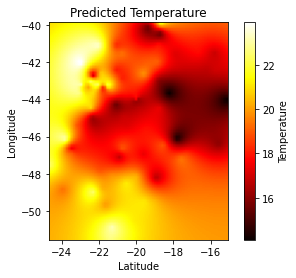

In [7]:
import matplotlib.pyplot as plt

# Define the range of latitudes and longitudes based on the training set
min_latitude = min(X_train[:,0])
max_latitude = max(X_train[:,0])
min_longitude = min(X_train[:,1])
max_longitude = max(X_train[:,1])

# Generate a grid of test latitudes and longitudes
num_points = 75
latitudes = np.linspace(min_latitude, max_latitude, num_points)
longitudes = np.linspace(min_longitude, max_longitude, num_points)
grid_latitude,grid_longtitude = np.meshgrid(latitudes, longitudes)

grid_latitude=grid_latitude.reshape(-1,)
grid_longtitude=grid_longtitude.reshape(-1,)
grid = grid = np.column_stack((grid_latitude, grid_longtitude))


# Calculate the predicted temperatures for each point in the grid (replace with your model prediction)
predicted_temperatures = compute_GP_mean(1.5,X_train,grid,y_train)


# Reshape the predicted temperatures back into a grid
predicted = predicted_temperatures.reshape((num_points, num_points))

# Create the plot
plt.imshow(predicted, origin='lower',
           extent=[min_latitude, max_latitude, min_longitude, max_longitude], cmap='hot')
plt.colorbar(label='Temperature')  # Add a colorbar with temperature values
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Predicted Temperature')
plt.show()

In [8]:
def compute_GP_variance(sigma,X_train,X_test,y_train):
    

    K_tr=cov_matrix(X_train,X_train,sigma)
    K_te=cov_matrix(X_test,X_test,sigma)
    K_te_tr=cov_matrix(X_test,X_train,sigma)
    K_tr_te=cov_matrix(X_train,X_test,sigma)
    print("shapes are {} , {}, {}, {}".format(K_tr.shape,K_te.shape,K_te_tr.shape,K_tr_te.shape))


    m_tr=np.array([20 for _ in range(X_train.shape[0])]).reshape(-1,1)
    m_te=np.array([20 for _ in range(X_test.shape[0])]).reshape(-1,1)

    var_te=K_te-K_te_tr@np.linalg.inv(K_tr)@K_tr_te
    return var_te

shapes are (93, 93) , (5625, 5625), (5625, 93), (93, 5625)


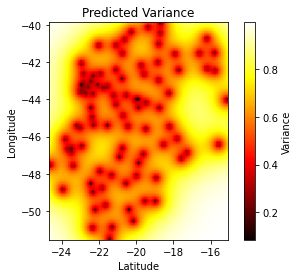

In [9]:
#Same method for the Variance
# Define the range of latitudes and longitudes based on the training set
min_latitude = min(X_train[:,0])
max_latitude = max(X_train[:,0])
min_longitude = min(X_train[:,1])
max_longitude = max(X_train[:,1])

# Generate a grid of test latitudes and longitudes
num_points = 75
latitudes = np.linspace(min_latitude, max_latitude, num_points)
longitudes = np.linspace(min_longitude, max_longitude, num_points)
grid_latitude,grid_longtitude = np.meshgrid(latitudes, longitudes)

grid_latitude=grid_latitude.reshape(-1,)
grid_longtitude=grid_longtitude.reshape(-1,)
grid = np.column_stack((grid_latitude, grid_longtitude))

predicted_variance = compute_GP_variance(1.5,X_train,grid,y_train)


diagonal = np.sqrt(np.diag(predicted_variance)).reshape((num_points, num_points))

# Create the plot
plt.imshow(diagonal, origin='lower',
           extent=[min_latitude, max_latitude, min_longitude, max_longitude], cmap='hot')
plt.colorbar(label='Variance')  
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Predicted Variance')
plt.show()

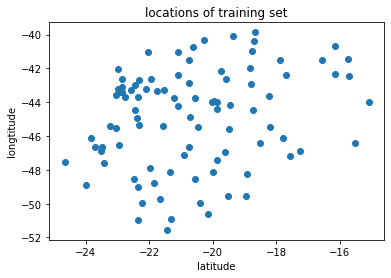

In [10]:
#locations of training set
fig,ax=plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1])

ax.set_title("locations of training set")
ax.set_xlabel("latitude")
ax.set_ylabel("longtitude")
plt.show()

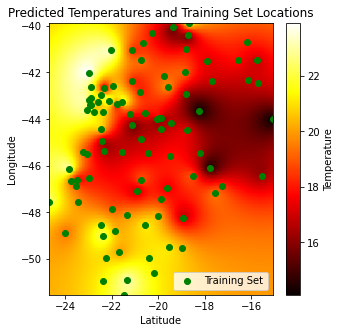

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 10))


im = ax.imshow(predicted, origin='lower',
               extent=[min_latitude, max_latitude, min_longitude, max_longitude], cmap='hot')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Predicted Variance')
plt.colorbar(im, ax=ax, label='Temperature', shrink=0.5)


ax.scatter(X_train[:, 0], X_train[:, 1], c='green', label='Training Set')
ax.set_title('Predicted Temperatures and Training Set Locations')

ax.legend()

plt.show()


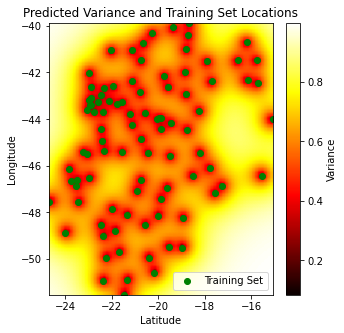

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 10))


im = ax.imshow(diagonal, origin='lower',
               extent=[min_latitude, max_latitude, min_longitude, max_longitude], cmap='hot')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Predicted Variance')
plt.colorbar(im, ax=ax, label='Variance', shrink=0.5)

ax.scatter(X_train[:, 0], X_train[:, 1], c='green', label='Training Set')
ax.set_title('Predicted Variance and Training Set Locations')

ax.legend()

plt.show()



It's clear shown above that the training set locations and points with low variance are highly overlapped. It can represent that the variance is low with the short distance of that prediction to a training point. 